# Normalizing Flows

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/borchero/pyblaze/blob/master/docs/examples/normalizing-flows.ipynb)
[![Download Jupyter Notebbok](https://img.shields.io/badge/Github-Download-brightgreen)](https://github.com/borchero/pyblaze/blob/master/docs/examples/normalizing-flows.ipynb)

**_Note: Explanations and theory will be added in the future._**

In [1]:
import sklearn.datasets as datasets
import torch
import torch.nn as nn
import torch.optim as optim
import pyblaze.nn as xnn
from pyblaze.utils.examples.normalizing_flows import train_and_plot
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 150

%reload_ext autoreload
%autoreload 2

## Data

In [2]:
data_unicluster = datasets.make_biclusters((4096, 2), 1, noise=0.3, minval=-2, maxval=2, random_state=17)[0]
data_tricluster = datasets.make_biclusters((4096, 2), 3, noise=0.1, minval=-2, maxval=2, random_state=14)[0]
data_tencluster = datasets.make_blobs(4096, 2, centers=[
    [-1.5, -1.5], [-0.5, -1.5], [0.5, -1.5], [1.5, -1.5],
    [-1, 0], [1, 0],
    [-1.5, 1.5], [-0.5, 1.5], [0.5, 1.5], [1.5, 1.5],
], cluster_std=0.1)[0]
data_moons = datasets.make_moons(4096, noise=0.05)[0]

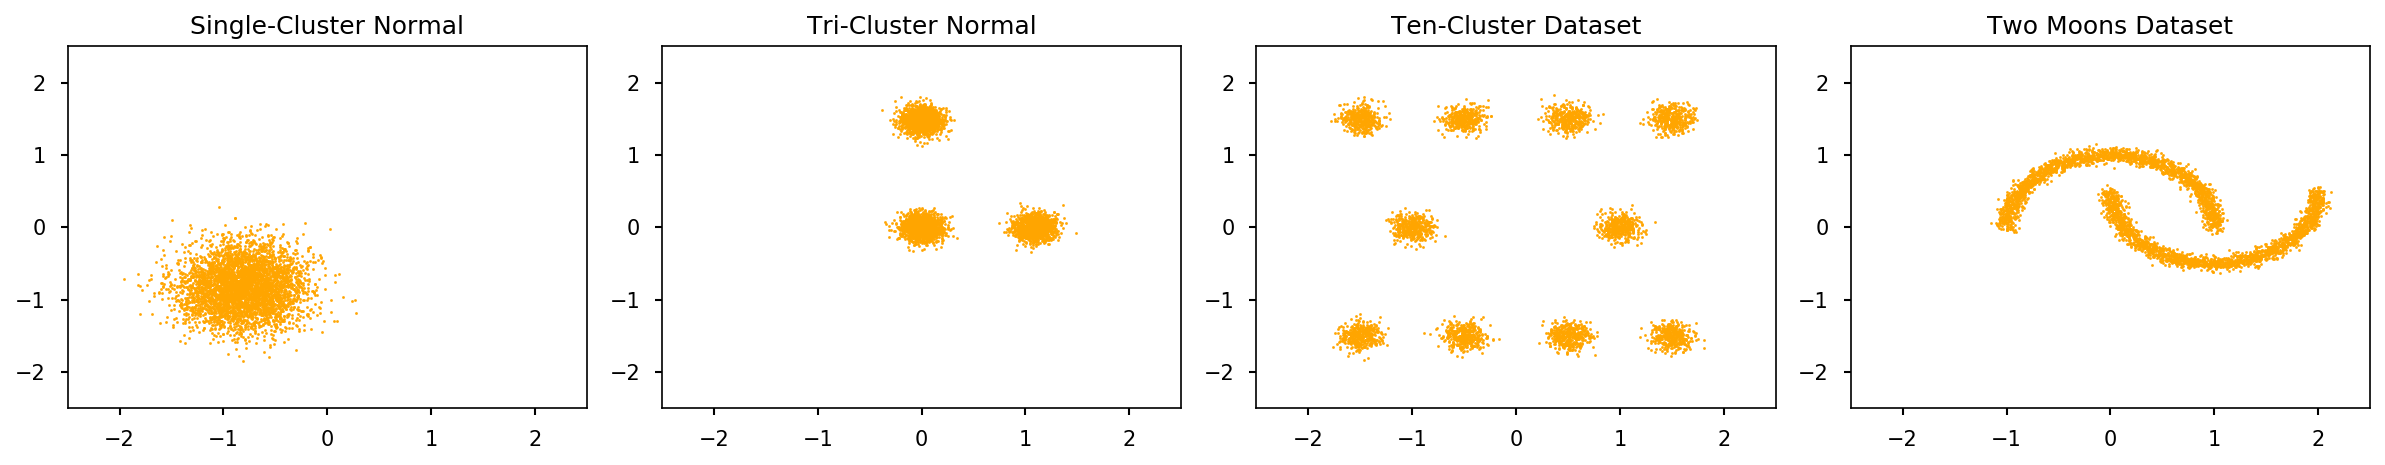

In [3]:
plt.figure(figsize=plt.figaspect(0.2))

plt.subplot(1, 4, 1)
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))
plt.scatter(*data_unicluster.T, s=1, color='orange')
plt.title('Single-Cluster Normal')

plt.subplot(1, 4, 2)
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))
plt.scatter(*data_tricluster.T, s=1, color='orange')
plt.title('Tri-Cluster Normal')

plt.subplot(1, 4, 3)
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))
plt.scatter(*data_tencluster.T, s=1, color='orange')
plt.title('Ten-Cluster Dataset')

plt.subplot(1, 4, 4)
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))
plt.scatter(*data_moons.T, s=1, color='orange')
plt.title('Two Moons Dataset')

plt.tight_layout()
plt.show()

## Transformations

In [4]:
datasets = [data_unicluster, data_tricluster, data_tencluster, data_moons]

### Affine Transform

Number of parameters: 4

Dataset (1/4)...
 [Elapsed 0:00:29 | 33.80 it/s]                                                      
Dataset (2/4)...
 [Elapsed 0:00:29 | 34.00 it/s]                                                      
Dataset (3/4)...
 [Elapsed 0:00:28 | 34.55 it/s]                                                      
Dataset (4/4)...
 [Elapsed 0:00:29 | 34.29 it/s]                                                      


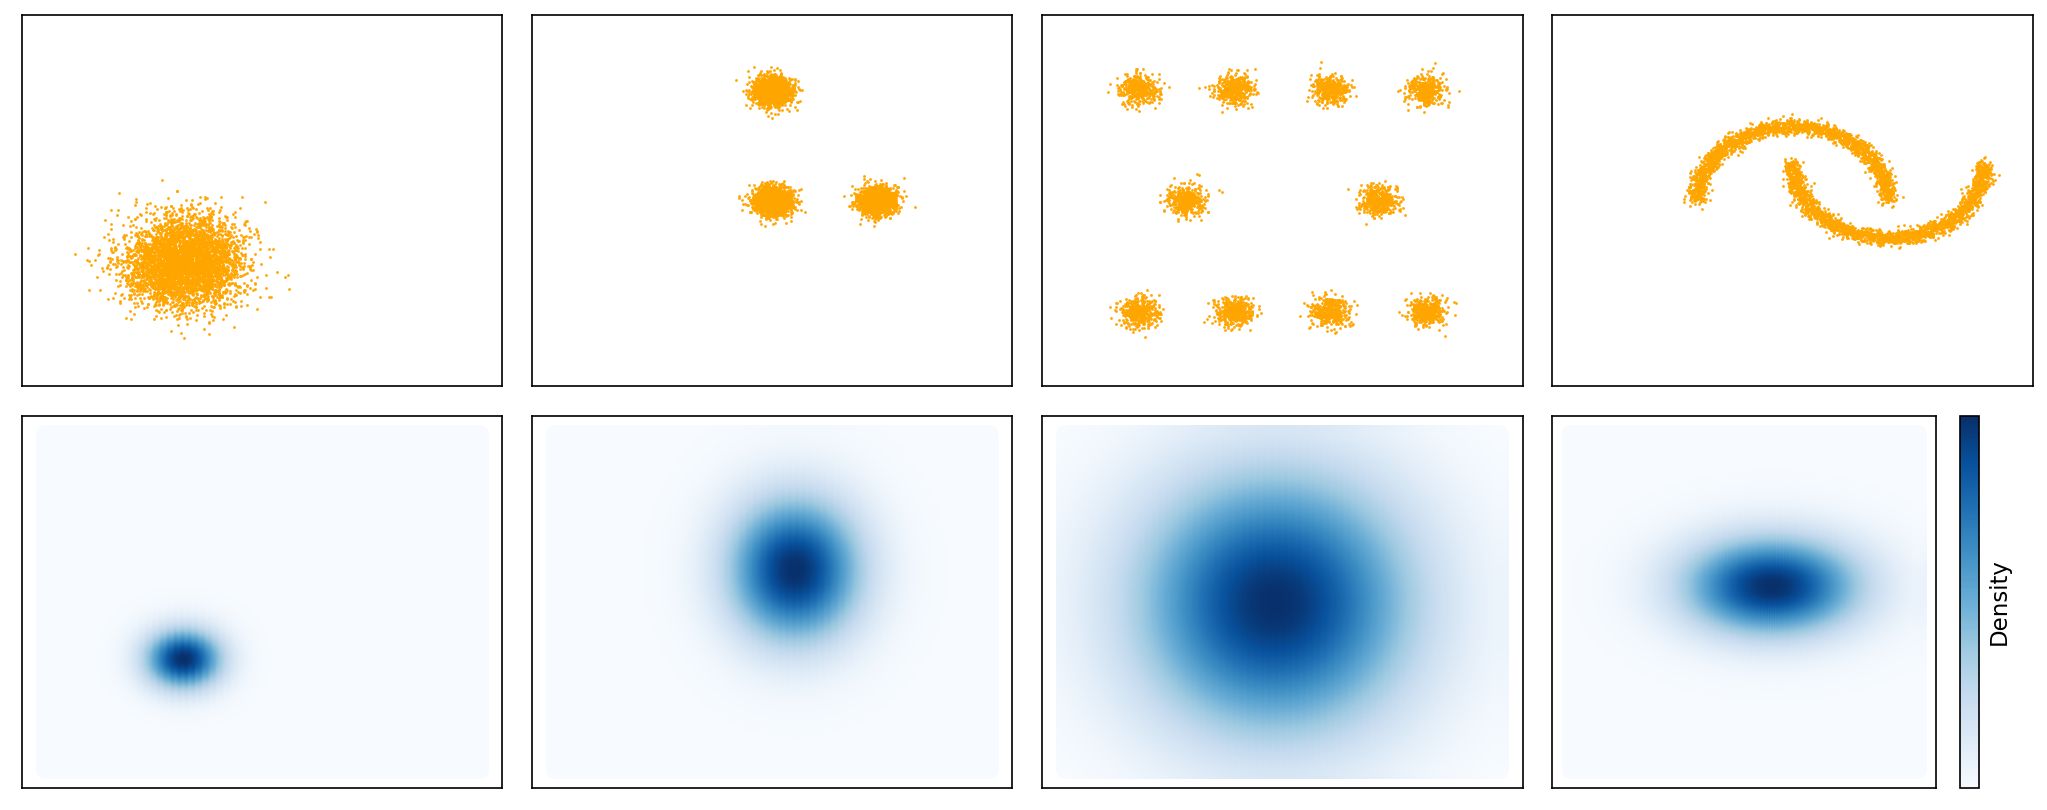

In [5]:
affine_model = xnn.NormalizingFlow([xnn.AffineTransform(2)])
print(f"Number of parameters: {sum(p.numel() for p in affine_model.parameters())}\n")

affine_engine = xnn.MLEEngine(affine_model, expects_data_target=False)
train_and_plot(affine_engine, datasets)

### Planar Transform

Number of parameters: 80

Dataset (1/4)...
 [Elapsed 0:01:02 | 15.88 it/s]                                                      
Dataset (2/4)...
 [Elapsed 0:01:02 | 15.89 it/s]                                                      
Dataset (3/4)...
 [Elapsed 0:01:02 | 15.96 it/s]                                                      
Dataset (4/4)...
 [Elapsed 0:01:02 | 15.93 it/s]                                                      


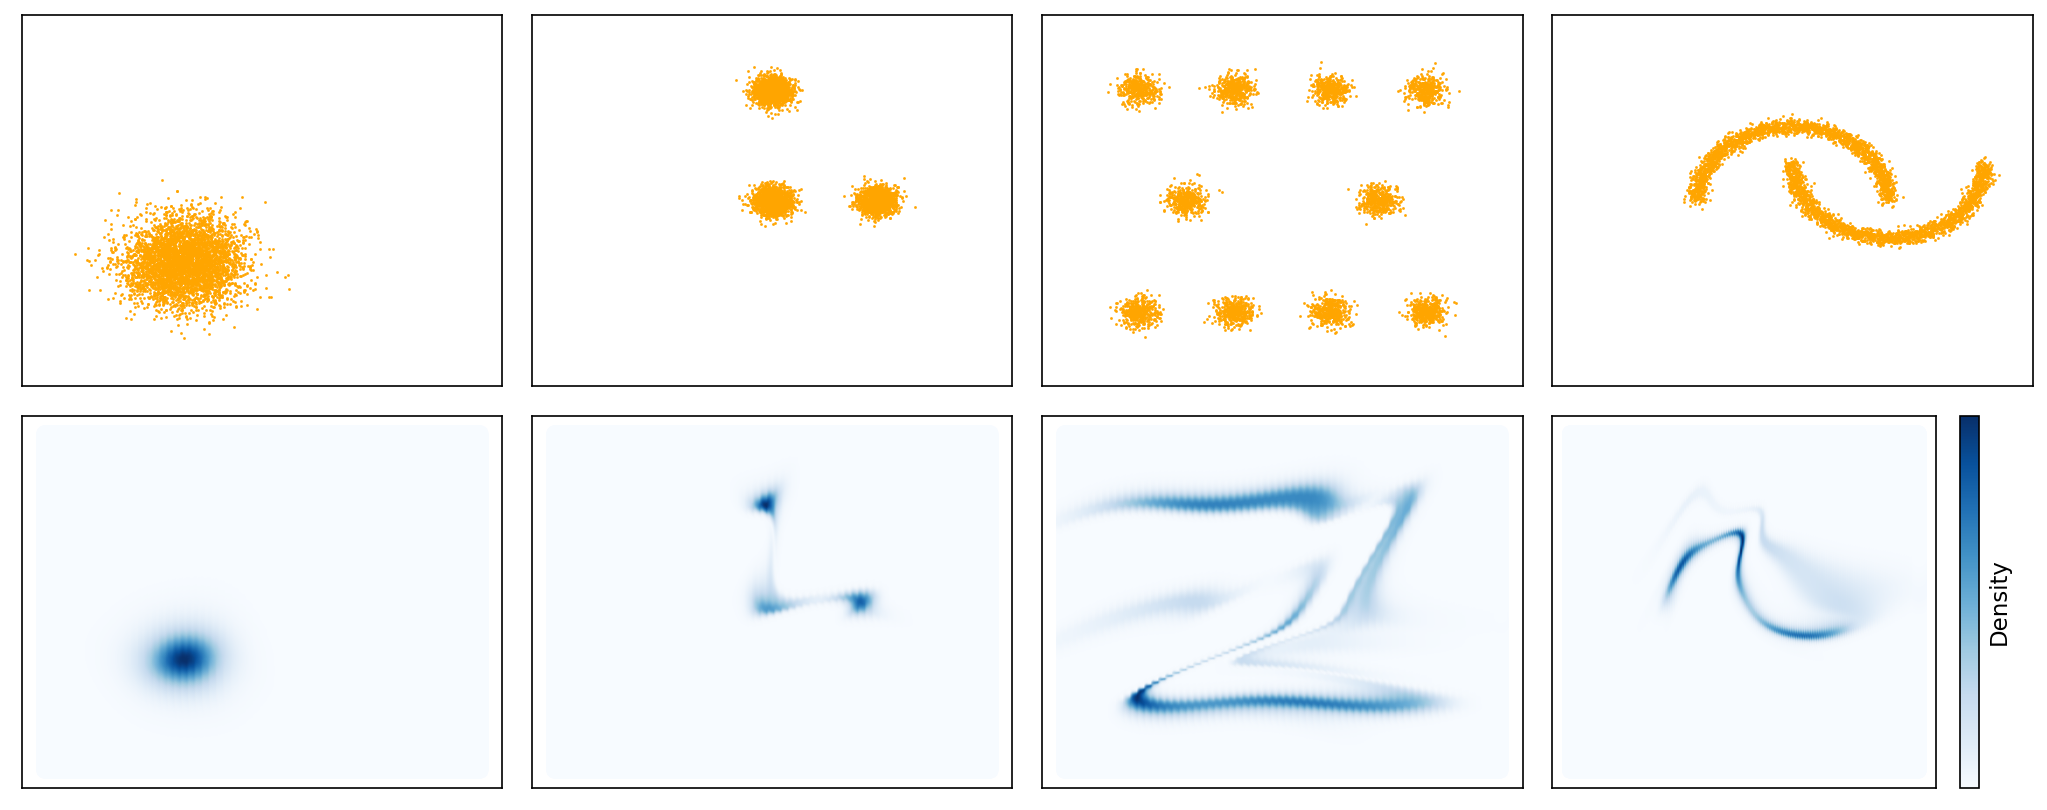

In [6]:
planar_model = xnn.NormalizingFlow([xnn.PlanarTransform(2) for _ in range(16)])
print(f"Number of parameters: {sum(p.numel() for p in planar_model.parameters())}\n")

planar_engine = xnn.MLEEngine(planar_model, expects_data_target=False)
train_and_plot(planar_engine, datasets)

### Radial Transform

Number of parameters: 128

Dataset (1/4)...
 [Elapsed 0:01:51 | 8.97 it/s]                                                      
Dataset (2/4)...
 [Elapsed 0:01:49 | 9.12 it/s]                                                      
Dataset (3/4)...
 [Elapsed 0:01:49 | 9.15 it/s]                                                      
Dataset (4/4)...
 [Elapsed 0:01:49 | 9.16 it/s]                                                      


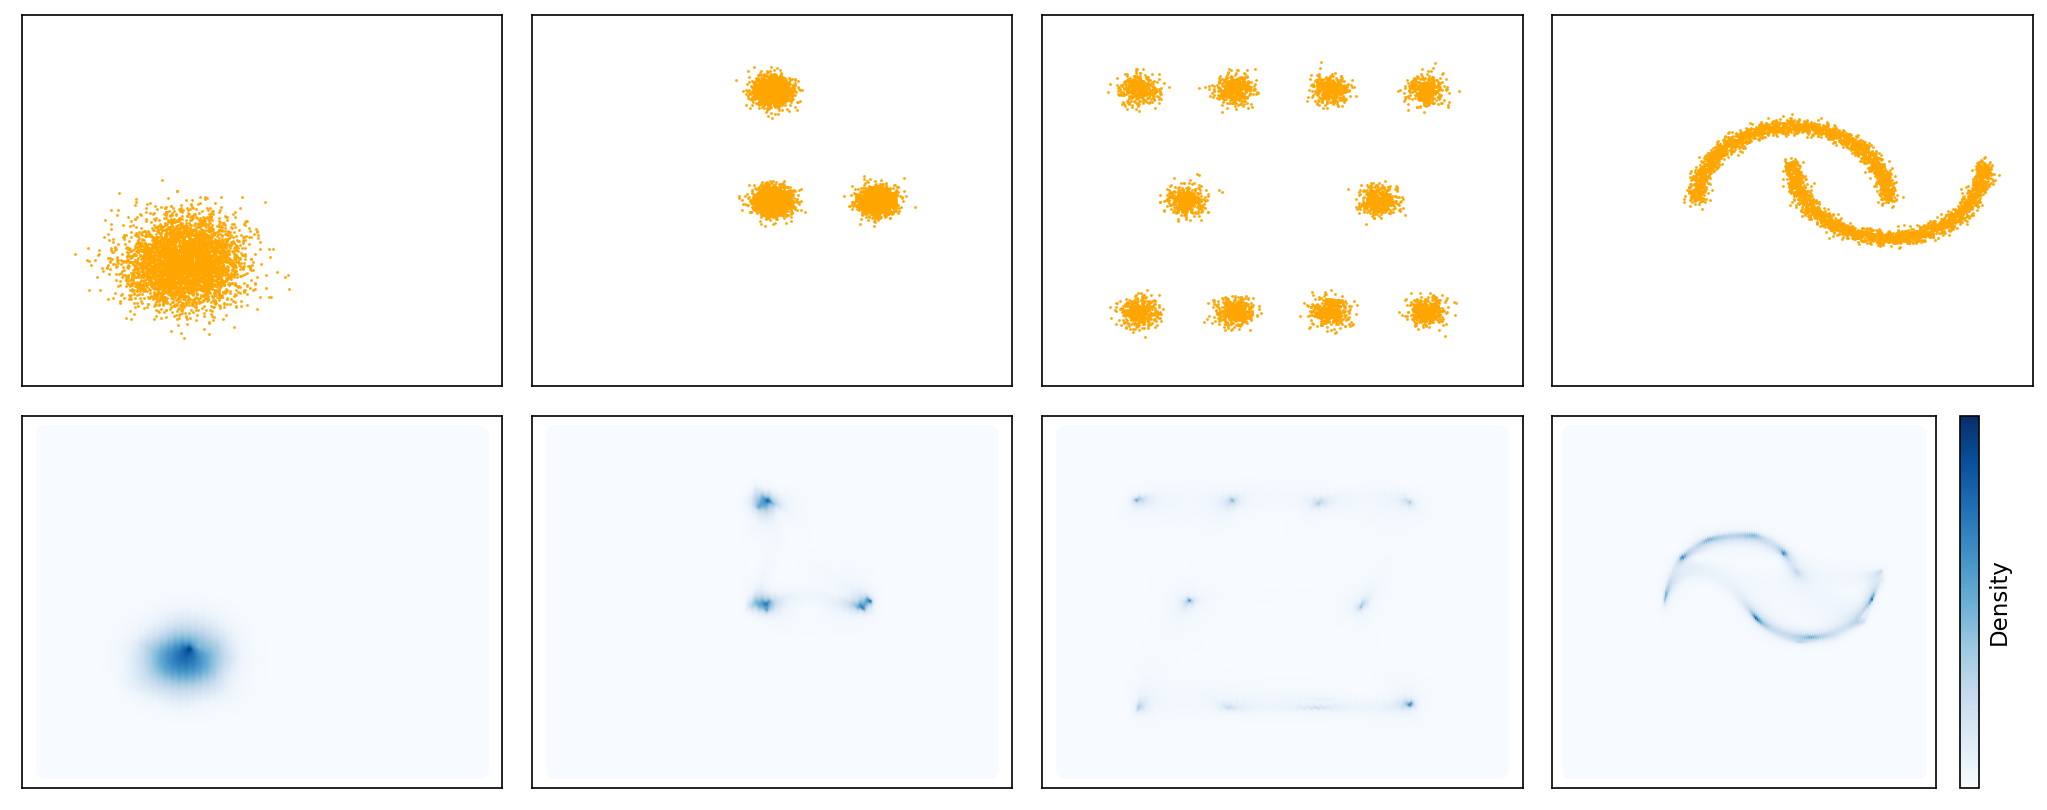

In [7]:
radial_model = xnn.NormalizingFlow([xnn.RadialTransform(2) for _ in range(32)])
print(f"Number of parameters: {sum(p.numel() for p in radial_model.parameters())}\n")

radial_engine = xnn.MLEEngine(radial_model, expects_data_target=False)
train_and_plot(radial_engine, datasets)

### Affine Coupling Transform

#### Shallow

Number of parameters: 608

Dataset (1/4)...
 [Elapsed 0:01:08 | 14.67 it/s]                                                      
Dataset (2/4)...
 [Elapsed 0:01:08 | 14.65 it/s]                                                      
Dataset (3/4)...
 [Elapsed 0:01:07 | 14.77 it/s]                                                      
Dataset (4/4)...
 [Elapsed 0:01:07 | 14.79 it/s]                                                      


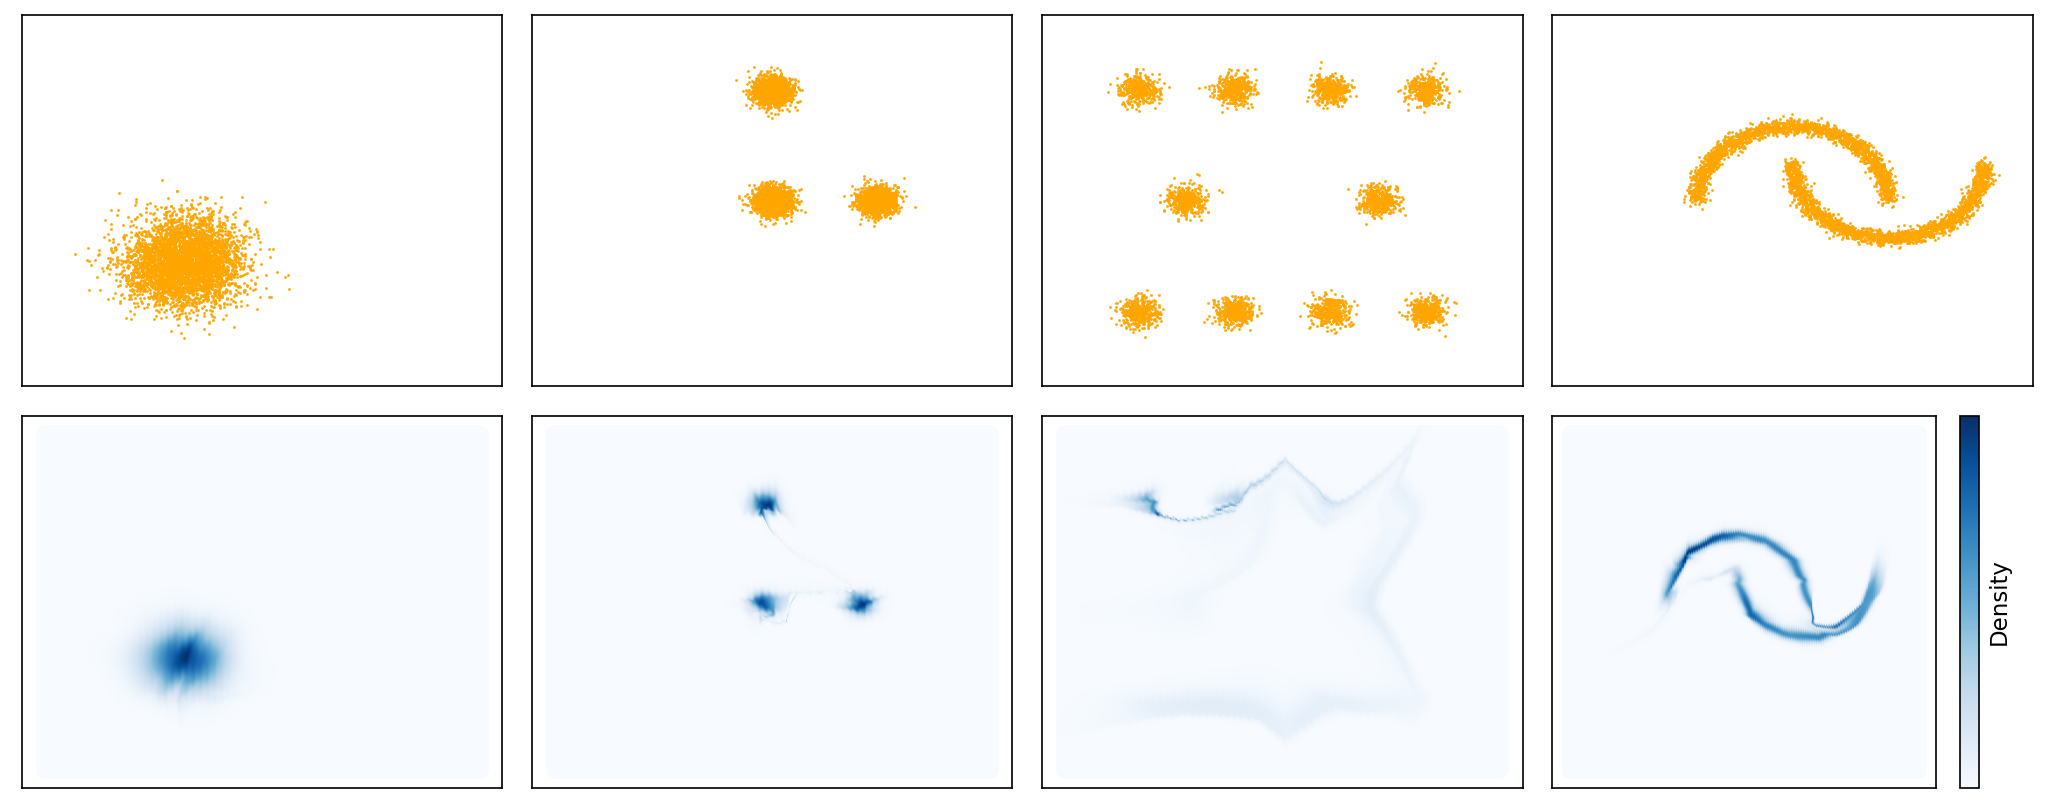

In [8]:
ac_shallow_model = xnn.NormalizingFlow([
    xnn.AffineCouplingTransform1d(2, 1, nn.Sequential(
        nn.Linear(1, 4),
        nn.LeakyReLU(),
        nn.Linear(4, 4),
        nn.LeakyReLU(),
        nn.Linear(4, 2)
    ), constrain_scale=True, reverse=i % 2 == 1)
    for i in range(16)
])
print(f"Number of parameters: {sum(p.numel() for p in ac_shallow_model.parameters())}\n")

ac_shallow_engine = xnn.MLEEngine(ac_shallow_model, expects_data_target=False)
train_and_plot(ac_shallow_engine, datasets)

#### Deep

Number of parameters: 1344

Dataset (1/4)...
 [Elapsed 0:02:40 | 6.24 it/s]                                                      
Dataset (2/4)...
 [Elapsed 0:02:40 | 6.22 it/s]                                                      
Dataset (3/4)...
 [Elapsed 0:02:40 | 6.25 it/s]                                                      
Dataset (4/4)...
 [Elapsed 0:02:39 | 6.26 it/s]                                                      


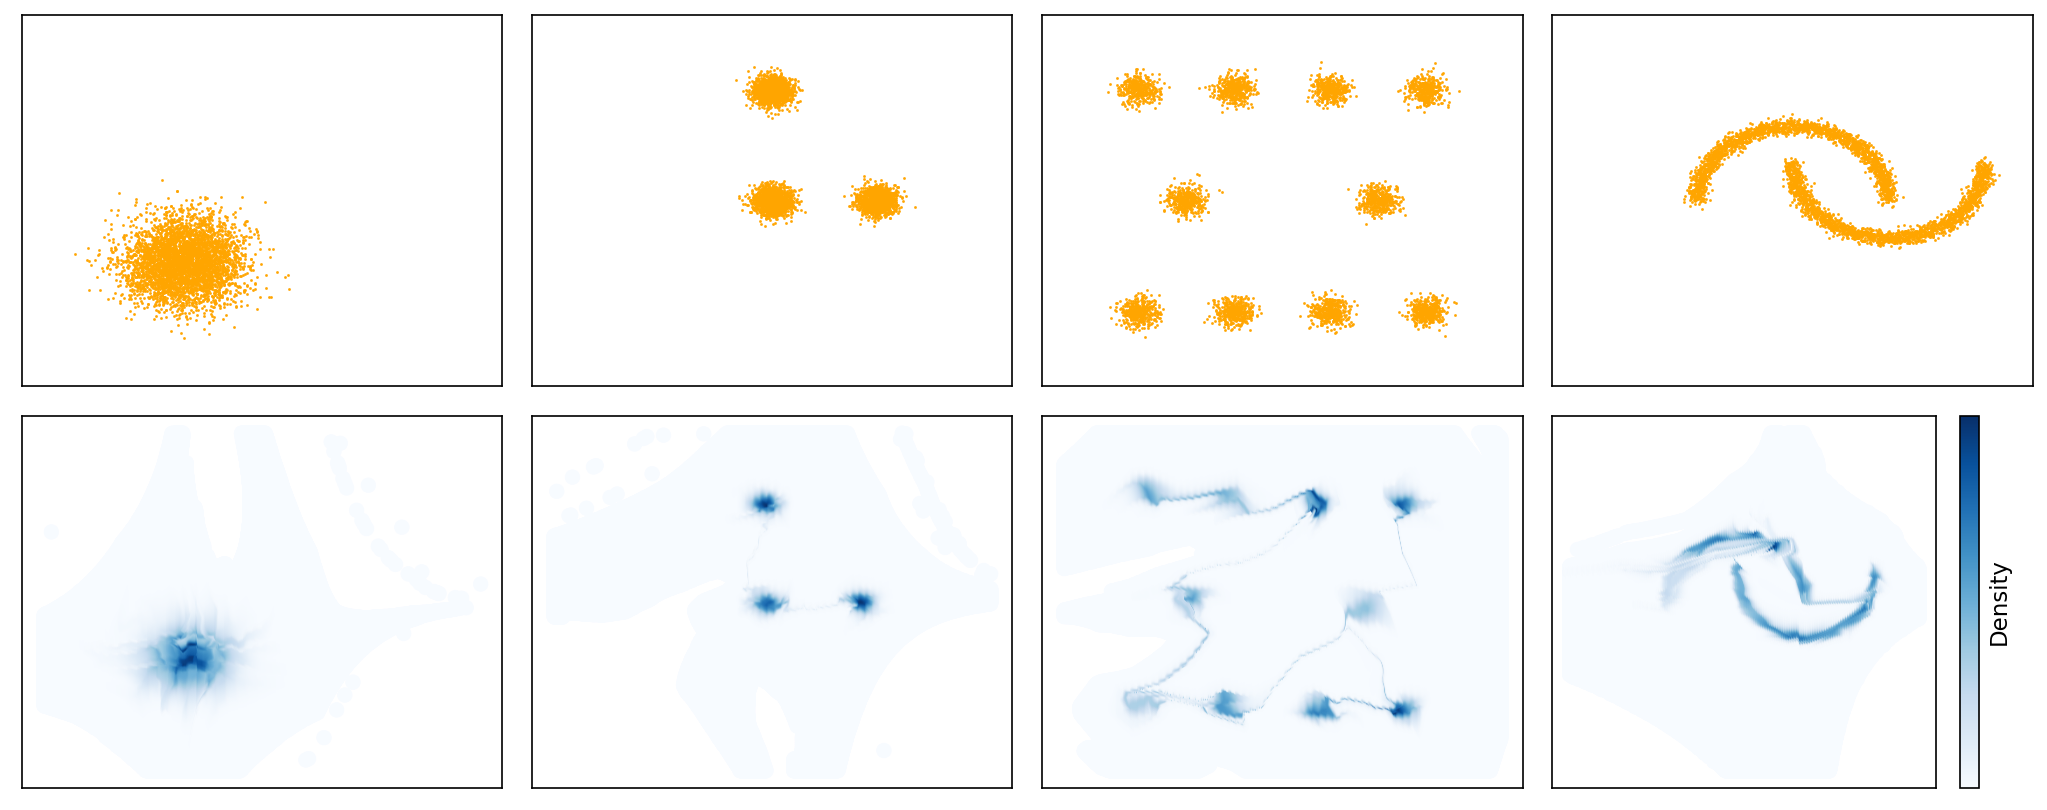

In [9]:
ac_deep_model = xnn.NormalizingFlow([m for i in range(32) for m in [
    xnn.AffineCouplingTransform1d(2, 1, nn.Sequential(
        nn.Linear(1, 4),
        nn.LeakyReLU(),
        nn.Linear(4, 4),
        nn.LeakyReLU(),
        nn.Linear(4, 2)
    ), reverse=i % 2 == 1),
    xnn.BatchNormTransform1d(2)
]])
print(f"Number of parameters: {sum(p.numel() for p in ac_deep_model.parameters())}\n")

ac_deep_engine = xnn.MLEEngine(ac_deep_model, expects_data_target=False)
train_and_plot(ac_deep_engine, datasets)

### Masked Autoregressive Transform

#### Shallow

Number of parameters: 896

Dataset (1/4)...
 [Elapsed 0:01:29 | 11.21 it/s]                                                      
Dataset (2/4)...
 [Elapsed 0:01:26 | 11.59 it/s]                                                      
Dataset (3/4)...
 [Elapsed 0:01:26 | 11.51 it/s]                                                      
Dataset (4/4)...
 [Elapsed 0:01:26 | 11.57 it/s]                                                      


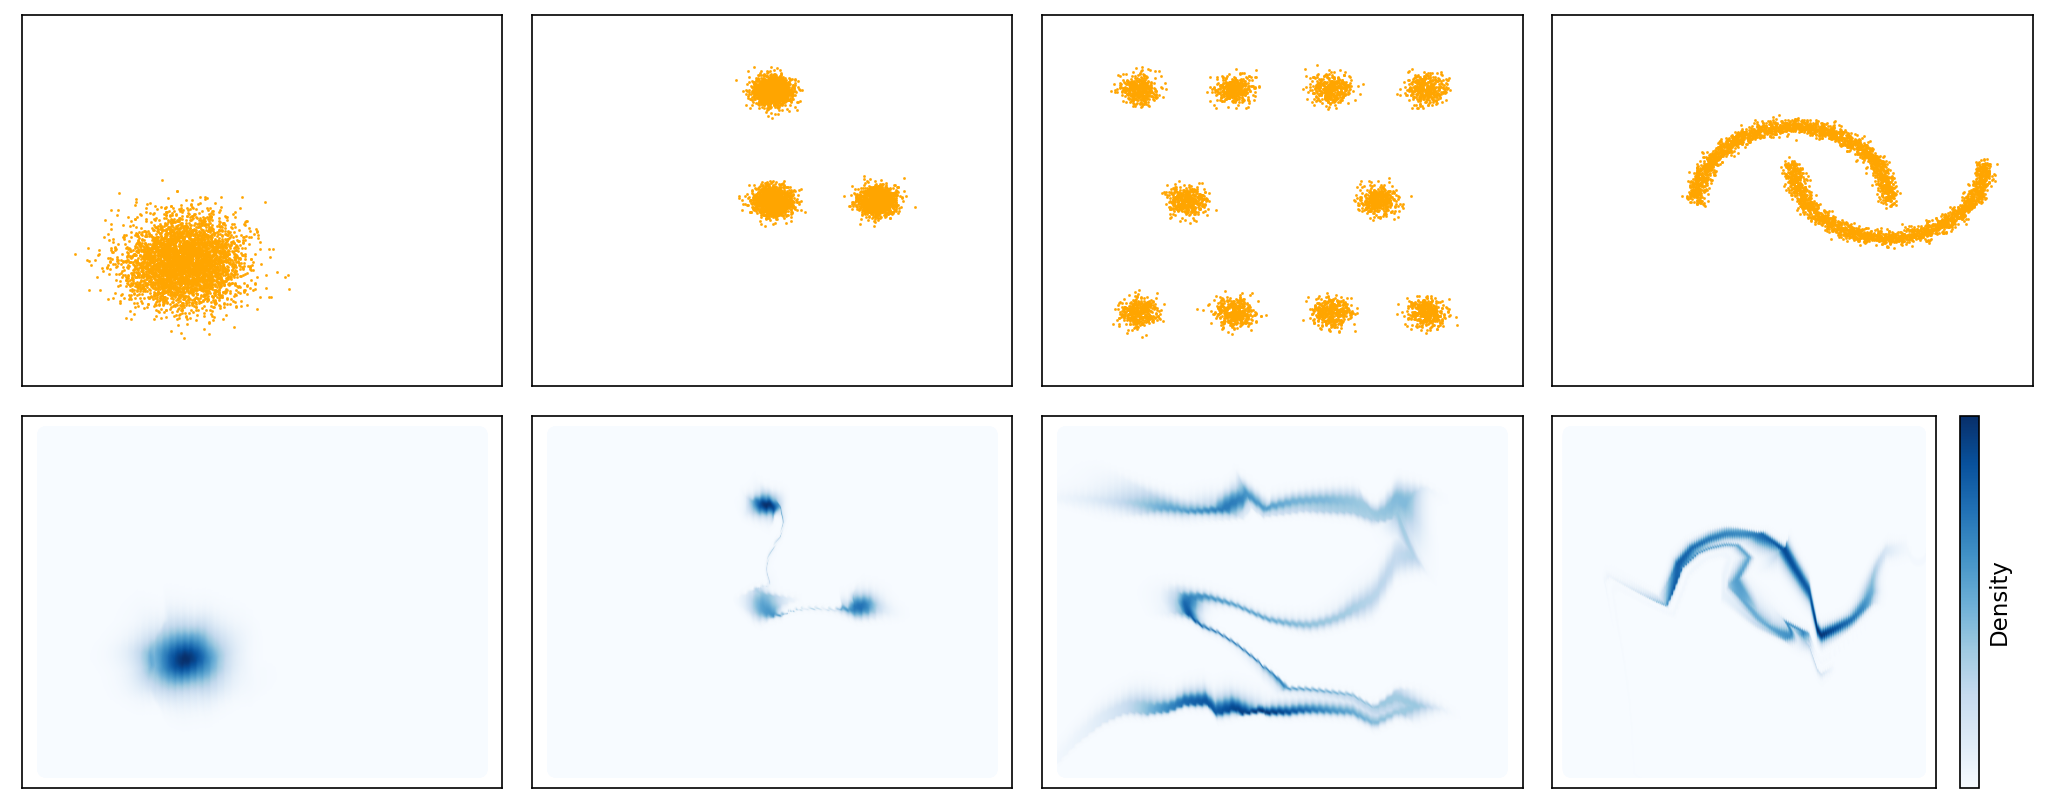

In [5]:
layers = []
for i in range(16):
    if i > 0:
        layers += [xnn.FlipTransform1d()]
    layers += [xnn.MaskedAutoregressiveTransform1d(2, 4, 4, constrain_scale=True)]

maf_shallow_model = xnn.NormalizingFlow(layers)
print(f"Number of parameters: {sum(p.numel() for p in maf_shallow_model.parameters())}\n")

maf_shallow_engine = xnn.MLEEngine(maf_shallow_model, expects_data_target=False)
train_and_plot(maf_shallow_engine, datasets)

#### Deep

Number of parameters: 1792

Dataset (1/4)...
 [Elapsed 0:01:25 | 11.64 it/s]                                                      
Dataset (2/4)...
 [Elapsed 0:01:25 | 11.65 it/s]                                                      
Dataset (3/4)...
 [Elapsed 0:01:25 | 11.63 it/s]                                                      
Dataset (4/4)...
 [Elapsed 0:01:26 | 11.53 it/s]                                                      


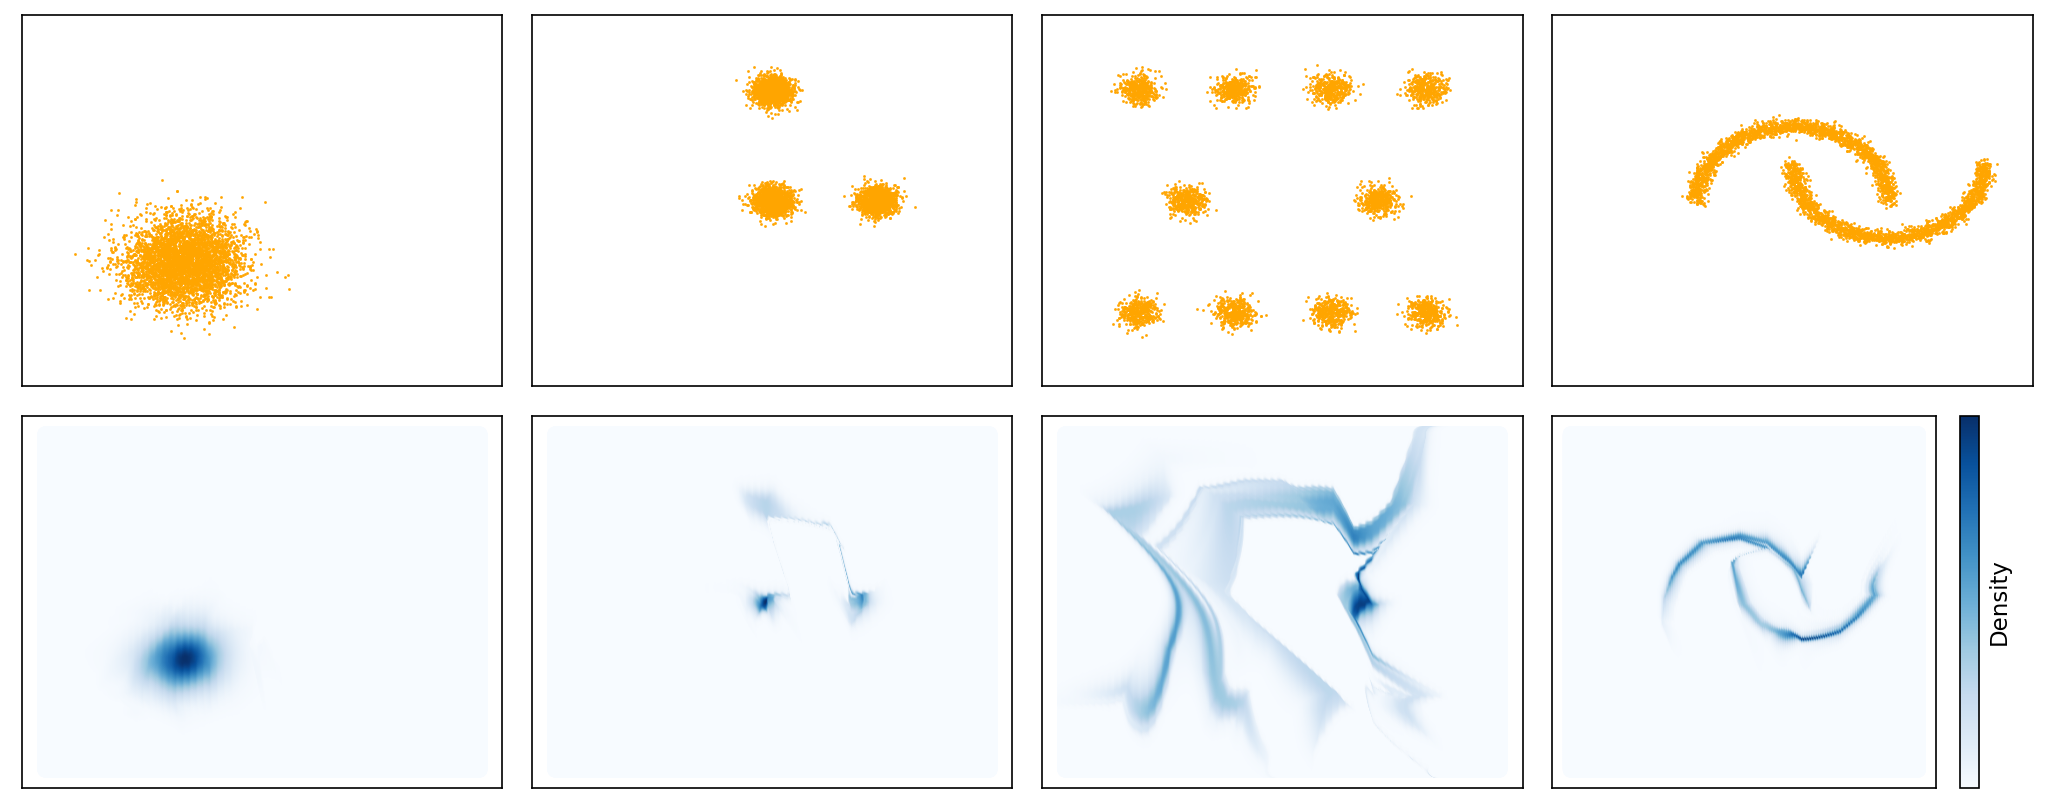

In [17]:
layers = []
for i in range(32):
    if i > 0:
        layers += [xnn.FlipTransform1d()]
    layers += [
        xnn.MaskedAutoregressiveTransform1d(2, 4, 4, constrain_scale=True),
        xnn.BatchNormTransform1d(2)
    ]

maf_deep_model = xnn.NormalizingFlow(layers)
print(f"Number of parameters: {sum(p.numel() for p in maf_deep_model.parameters())}\n")

maf_deep_engine = xnn.MLEEngine(maf_shallow_model, expects_data_target=False)
train_and_plot(maf_deep_engine, datasets)